<a href="https://colab.research.google.com/github/a-forty-two/EY_batch11_3Mar/blob/main/5Mar_003_NLPWithTF_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from keras import layers, optimizers, losses, metrics

In [3]:
datasets = keras.datasets

In [4]:
dir(datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [5]:
data = datasets.imdb

In [6]:
dir(data)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'get_word_index',
 'load_data']

In [8]:
(xtrain, ytrain), (xtest, ytest) = data.load_data(num_words=10000)

In [34]:
wordindex = data.get_word_index()

In [11]:
wordindex["talent"]

673

In [13]:
ytrain # 1-> pos, 0-> neg

array([1, 0, 0, ..., 0, 1, 0])

In [15]:
print(xtrain[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [16]:
indexword = { v:k for k,v in wordindex.items()}

In [17]:
def decoder(sentence):
  return " ".join([indexword[word] for word in sentence])

In [18]:
decoder(xtrain[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [ ]:
# TAGS -> hypertexts which indicate the model about special meanings!

# Neural networks have fixed size-> sentence or movie reviews -> ALL of them should be fixed size?
# all movie reviews won't follow this rule and some may be shorter and some longer than the neural network input
# PADDING and TRUCATE -> long sentences are chopped with TRUCATION, and shorter ones are filled with 0 with <PAD>


# <PAD> = 0. Wherever we have empty spaces or missing words, we just add 0s or <PAD>
# <START> = 1. Start indicates start of input
# <UNK> = 2. UNKNOWN WORDS-> remember we loaded only top 10,000 frequently used words; anything outside this limit
#           will be unknown!
# <UNUSED> = 3. THese are words that were present but never used in our model!


In [19]:
for i in range(5):
  print(xtrain[i])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 1

In [25]:
indexword[1] # this should have been <START> tag, but we found 'the' here instead

'the'

In [26]:
indexword[2]# this should have been <UNKNOWN> tag, but we found 'and' here instead

'and'

In [27]:
indexword[3] # this should have been <UNUSED> tag, but we found 'and' here instead

'a'

In [28]:
indexword[0] # this should have been <PAD> tag, but there's nothing here!

KeyError: 0

In [40]:
# we will create 3 extra spaces in our dictionary!
# because anyway 0 doesn't exist!



# create extra space for the rest -> start, unknown and unused!

newwordindex = {word:index+3 for word, index in wordindex.items()}
newwordindex['<PAD>'] = 0
newwordindex['<START>'] = 1
newwordindex['<UNKNOWN>'] = 2
newwordindex['<UNUSED>'] = 3


newindexword = {v:k for k,v in newwordindex.items()}


In [42]:
newindexword[0], newindexword[1]

('<PAD>', '<START>')

In [43]:
def decoder(sentence):
  return " ".join([newindexword[word] for word in sentence])

In [44]:
decoder(xtrain[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNKNOWN> is an amazing actor and now the same being director <UNKNOWN> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNKNOWN> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNKNOWN> to the two little boy's that played the <UNKNOWN> of norman and paul they were just brilliant children are often left out of the <UNKNOWN> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and 

In [45]:
ytrain[0]

1

In [46]:
# algorithms-> Every deep learning algo

# Generate features ---> learn pattern



# Learn pattern -> 3 Dense Layers (3 fully connected layers)
# in order for these deep layers to learn, we need 1-D features!

# embedding layer which understands vectors behind words is a MATRIX!

# Feature generation:
# Embedding layer -> which will generate a matrix of vectors for every word!
# Global Average Pooling -> which will calcualte avg of all vectors and convert it into 1-D data


In [47]:
# Feature Generation + 3 Dense Layers

# Embedding Layer -> Global Average Pooling -> 3 X Dense Layers

In [48]:
# if this were to be images->
# feature generation + 3 dense layers
# converted 2-D images into 1-D with help of reshaping layers, adn then 3 X Dense layers

# if this were to be colored images
# feature generation + 3 dense layers
# broken into RGB channels-> each channel will get multiple with many diff types of filter generating
# matrices-> matrices will be reshaped into 1-D -> 3 X Dense Layers


In [51]:
layer1 = layers.Embedding(10000, 16, input_length=256)
layer2 = layers.GlobalAveragePooling1D()
layer3 = layers.Dense(32, activation='relu')
layer4 = layers.Dense(64, activation='relu')
layer5 = layers.Dense(1, activation='sigmoid')

In [52]:
model = keras.Sequential([layer1, layer2, layer3, layer4, layer5])


In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
# make all data fixed size before passing to the network

# keras's data api has NLP feature engineering functions!


In [57]:
from os import truncate
xtrain_fixed = keras.preprocessing.sequence.pad_sequences(xtrain,
                                                               value=0,
                                                               padding='post',
                                                               maxlen=256)

In [63]:
xtest_fixed = keras.preprocessing.sequence.pad_sequences(xtest,
                                                               value=0,
                                                               padding='post',
                                                               maxlen=256)

In [62]:
for i in range(15,20):
  print(len(xtrain_fixed[i]), end=' ')

256 256 256 256 256 

In [61]:
for i in range(15,20):
  print(decoder(xtrain_fixed[i]))

<START> a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh <UNKNOWN> like character with wall to wall hot babes and mix in a <UNKNOWN> and you will have this sorry excuse for a movie i really got a laugh out of the dr evil like heavily <UNKNOWN> compound the plot was somewhere between preposterous and non existent how many <UNKNOWN> are willing to make a 25 million dollar bet on a car race answer 4 but didn't they become <UNKNOWN> through <UNKNOWN> responsibility this was written for <UNKNOWN> males it plays like a video game i did enjoy the <UNKNOWN> ii landing in the desert though <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

In [64]:
history = model.fit(xtrain_fixed,
                    ytrain,
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.5457 - loss: 0.6914 - val_accuracy: 0.7260 - val_loss: 0.6748
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.7244 - loss: 0.6573 - val_accuracy: 0.7928 - val_loss: 0.5603
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8094 - loss: 0.5129 - val_accuracy: 0.8434 - val_loss: 0.4019
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8531 - loss: 0.3693 - val_accuracy: 0.8610 - val_loss: 0.3432
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8776 - loss: 0.3041 - val_accuracy: 0.8150 - val_loss: 0.3899
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8812 - loss: 0.2856 - val_accuracy: 0.8554 - val_loss: 0.3286
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8975 - loss: 0.2545 - val_accuracy: 0.8846 - val_loss: 0.2892
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9177 - loss: 0.2212 - val_accuracy: 0.8620 - v

In [65]:
p = model.predict(xtest_fixed)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [67]:
p[:5]

array([[0.29777098],
       [0.999997  ],
       [0.9982355 ],
       [0.08709548],
       [0.999625  ]], dtype=float32)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [68]:
accuracy_score(ytest, p.round() )

0.85304

In [69]:
precision_score(ytest, p.round() )

0.8369731215638363

In [70]:
recall_score(ytest, p.round() )

0.87688

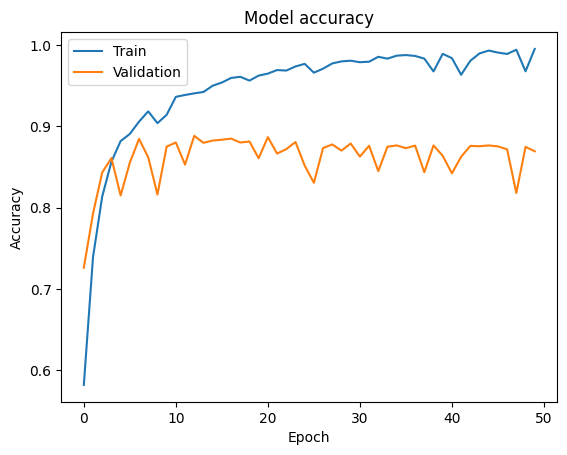

In [71]:

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [73]:
model.save('sentiment.keras')